# <center>Kural Tabanlı Sınıflandırma ile Potansiyel Müşteri Getirisi Hesaplama<center> 


## İş Problemi: 
<hr />
- Bir oyun şirketi müşterilerinin bazı özelliklerini kullanarak seviye tabanlı (levelbased) yeni müşteri tanımları(persona) oluşturmak ve bu yeni müşteri tanımlarına göre segmentler oluşturup bu segmentlere göre yeni gelebilecek müşterilerin şirkete ortalama ne kadar kazandırabileceğini tahmin etmek istemektedir.Örneğin: Türkiye’den IOS kullanıcısı olan 25 yaşındaki bir erkek kullanıcının ortalama ne kadar kazandırabileceği belirlenmek isteniyor. <br>

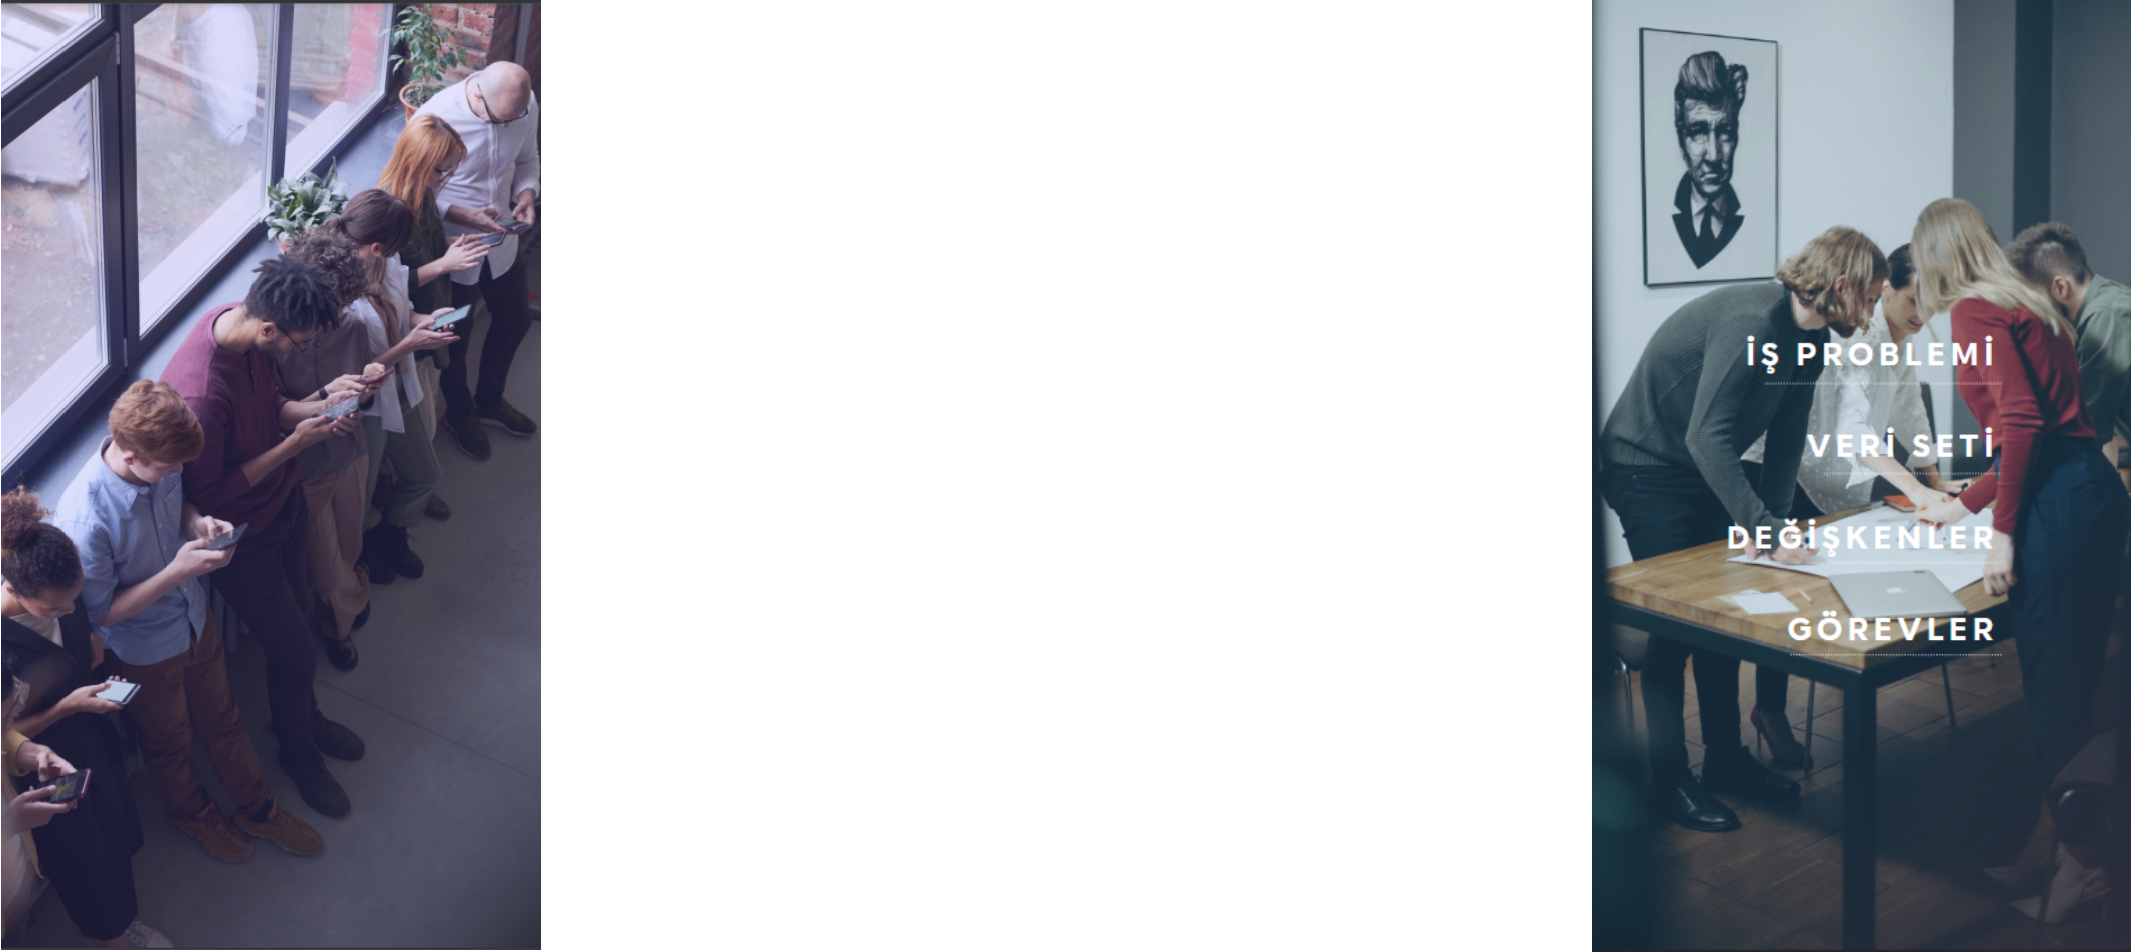

## Veri Setinin Hikayesi
<hr />
- Persona.csv veri seti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satın alan kullanıcıların bazı demografik bilgilerini barındırmaktadır. Veri seti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir. 
<br><br><br>

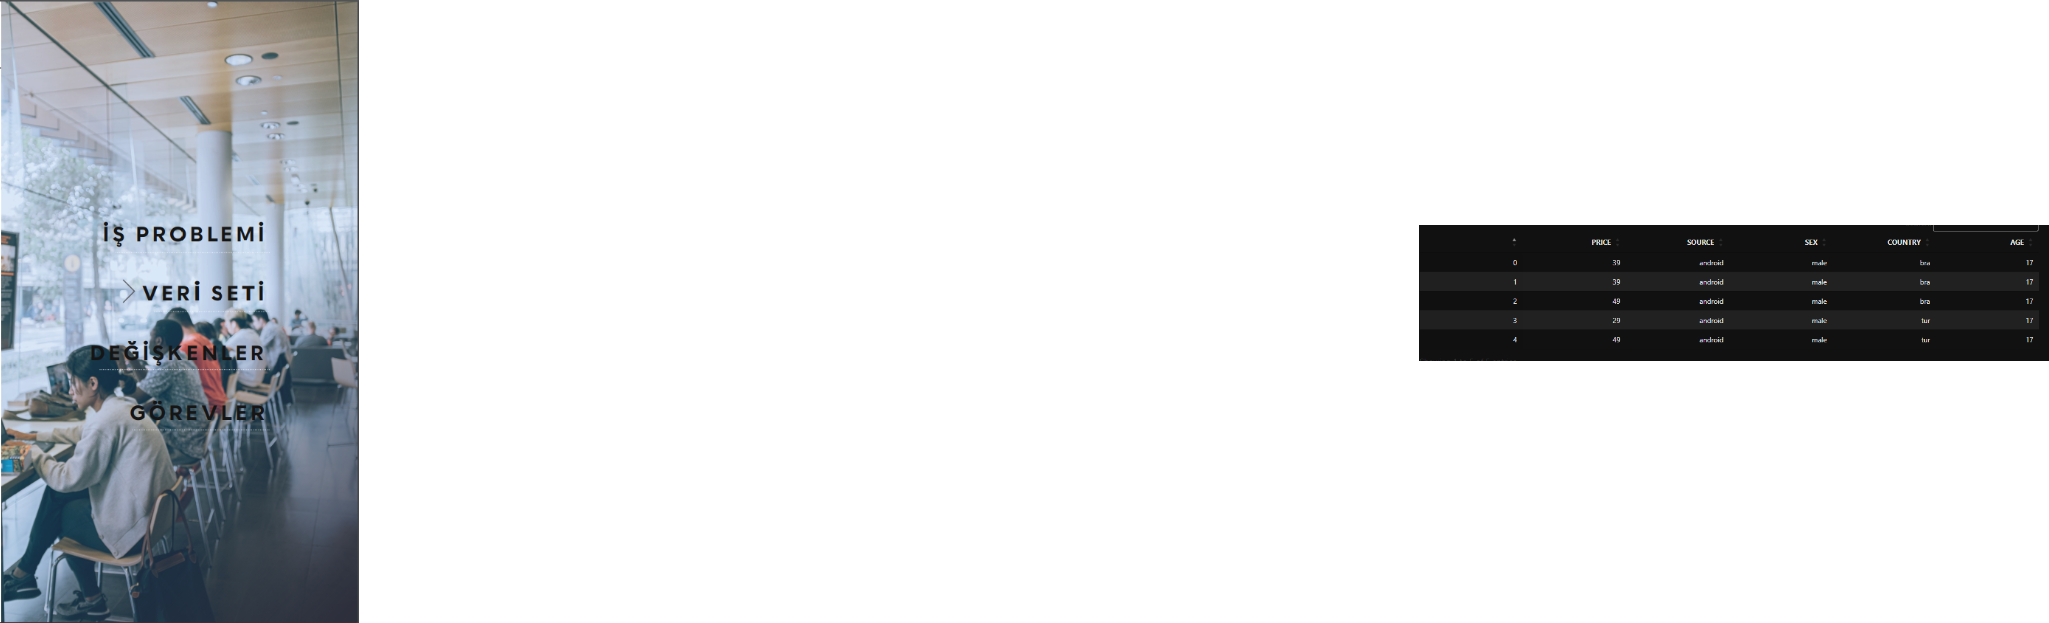

<h1>Değişkenler<h1>
    <hr />
    <br>

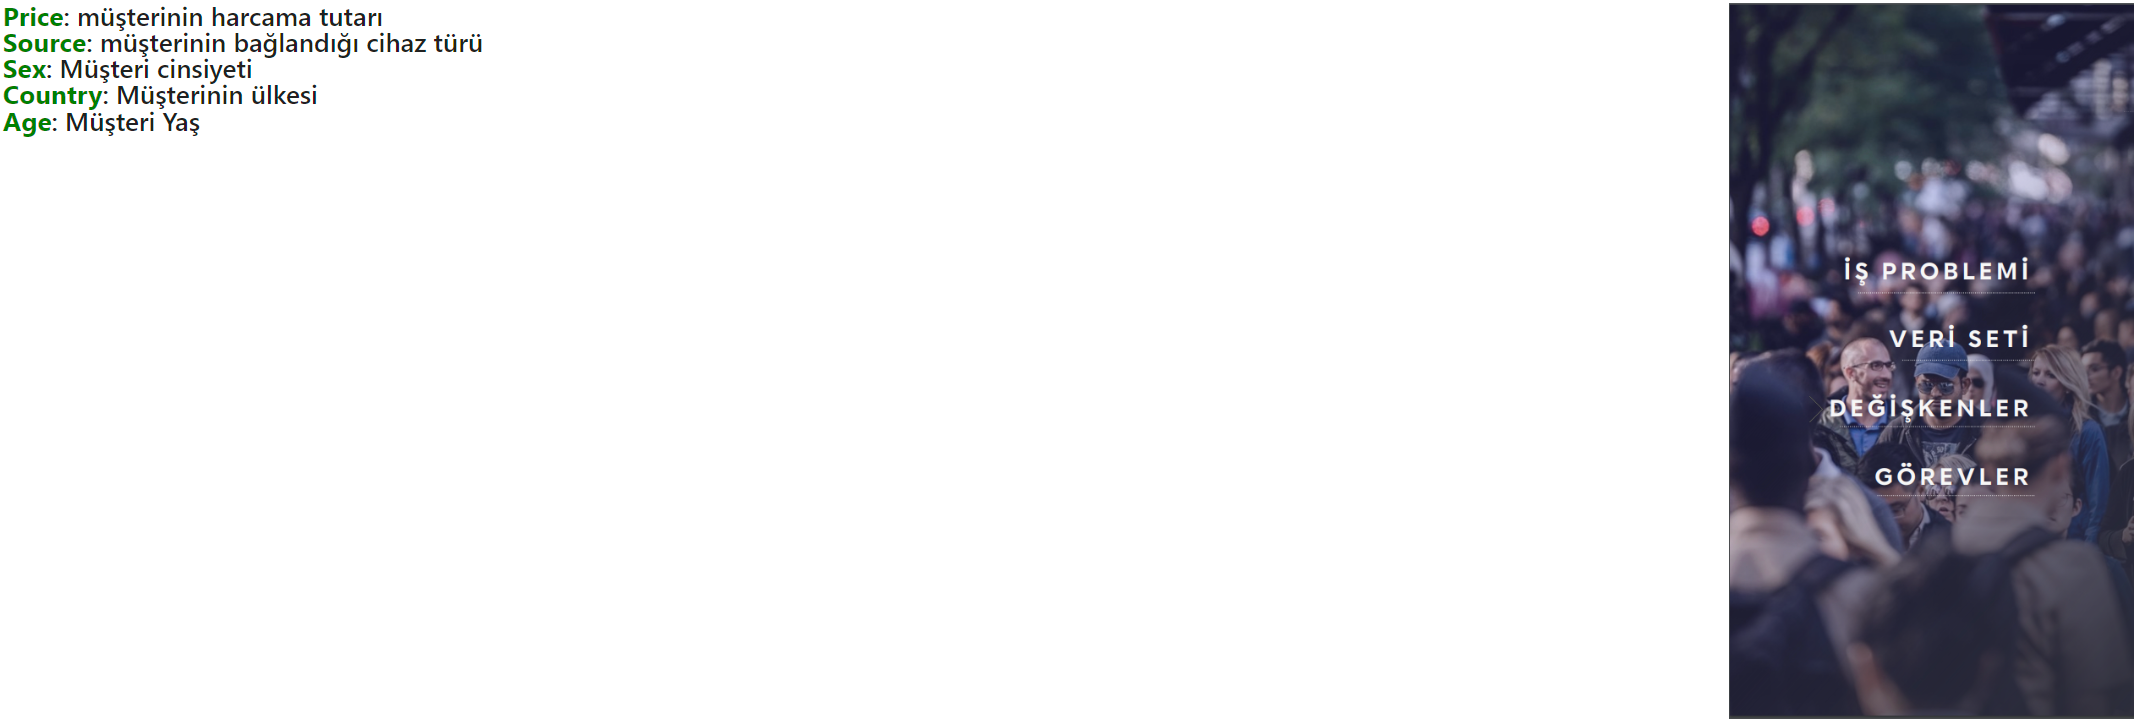

<h1>Proje Görevi<h1>
    <hr />

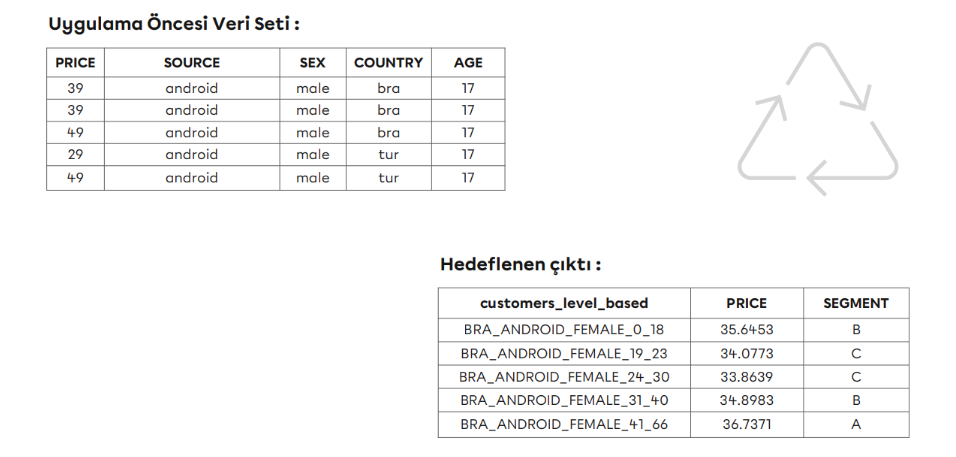

### Proje için gerekli kütüphaneleri aktive edelim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Görselleştirme için
import seaborn as sns # Görselleştirme için
from termcolor import colored # Text renklendirme için

colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"] # Görseller için renk paleti

- Veri setinin genel bilgilerini görmek için bir fonksiyon tanımlayalım

In [2]:
def check_df(dataframe, head=5, tail=5):
    print(colored("*" * 70, "green"))
    print(colored(" Shape ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.shape)

    print(colored("*" * 70, "green"))
    print(colored(" Types ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.dtypes)

    print(colored("*" * 70, "green"))
    print(colored(" Head ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.head(head))

    print(colored("*" * 70, "green"))
    print(colored(" Tail ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.tail(tail))

    print(colored("*" * 70, "green"))
    print(colored(" NA ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.isnull().sum())

    print(colored("*" * 70, "green"))
    print(colored(" Quantiles ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print(colored("*" * 70, "green"))
    print(colored(" Duplicated Rows ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.duplicated().sum())

    print(colored("*" * 70, "green"))
    print(colored(" Unique Values ".center(70, "*"), "green"))
    print(colored("*" * 70, "green"))
    print(dataframe.nunique())

- Projede kullanıcak olan veri setini(Persona.csv) dosyasını yükleyelim.

In [3]:
df = pd.read_csv("C:/Users/suley/OneDrive/Masaüstü/bootcamp/python_programlama/week3//persona.csv")
check_df(df)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(5000, 5)
**********************************************************************
******************************* Types ********************************
**********************************************************************
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
*************************

- İleride yapılan işlemleri kolaylaştırması için tüm değişken isimlerini küçük harflerle değiştirelim. Kategorik ve sayısal değişkenleri ayıralım

In [4]:
df.columns = [col.lower() for col in df.columns]
num_cols = ["age"]
cat_cols = [col for col in df.columns if col not in num_cols]

In [5]:
print(cat_cols)
print(num_cols)

['price', 'source', 'sex', 'country']
['age']


- Yapılacak görselleştirmeler için fonksiyon tanımlayalım.

In [6]:
def cat_plots(dataframe, cat_col):
    plt.figure(figsize=(15, 10))
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 2, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    plt.subplot(1, 2, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)
    plt.show(block=True)

- Soru 2: Kaç unique source vardır? Frekansları nedir?

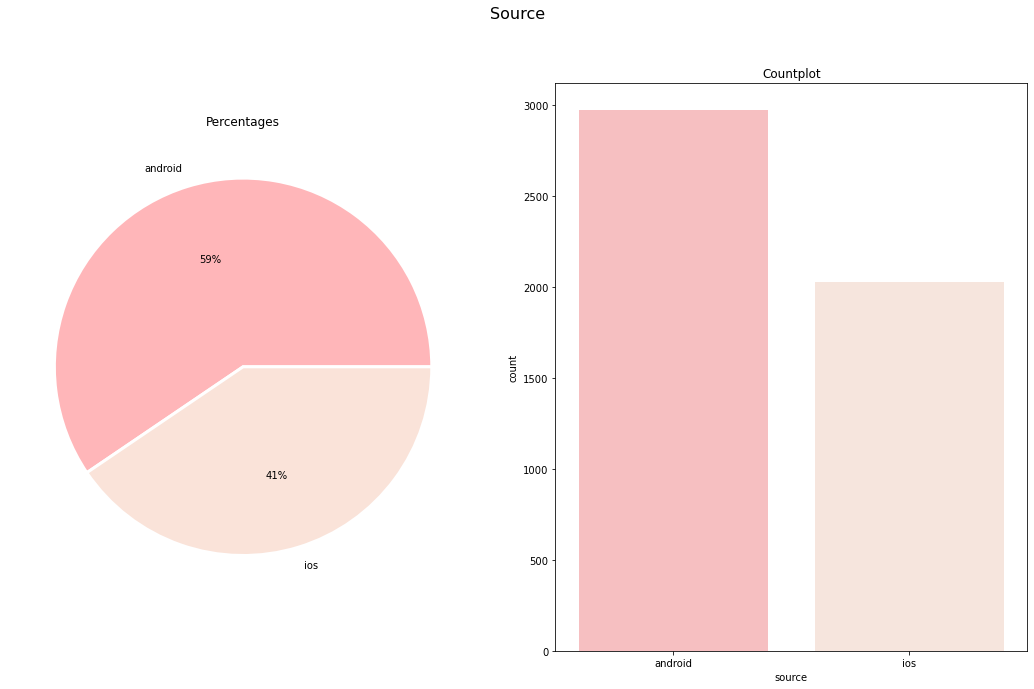

android    2974
ios        2026
Name: source, dtype: int64


In [7]:
cat_plots(df, "source")
print(df["source"].value_counts())

- Soru 3: Kaç unique Price vardır?

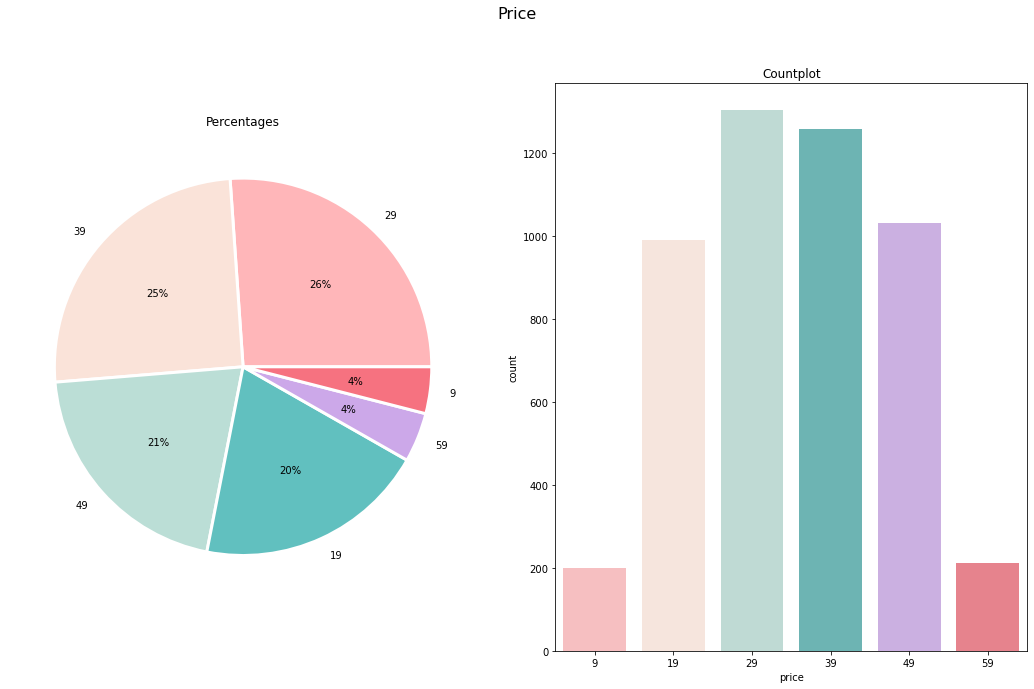

6


In [8]:
cat_plots(df, "price")
print(df["price"].nunique())

- Soru 4: Hangi Price'dan kaçar tane satış gerçekleşmiş?

In [9]:
df["price"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: price, dtype: int64

- Soru 5: Hangi ülkeden kaçar tane satış olmuş?

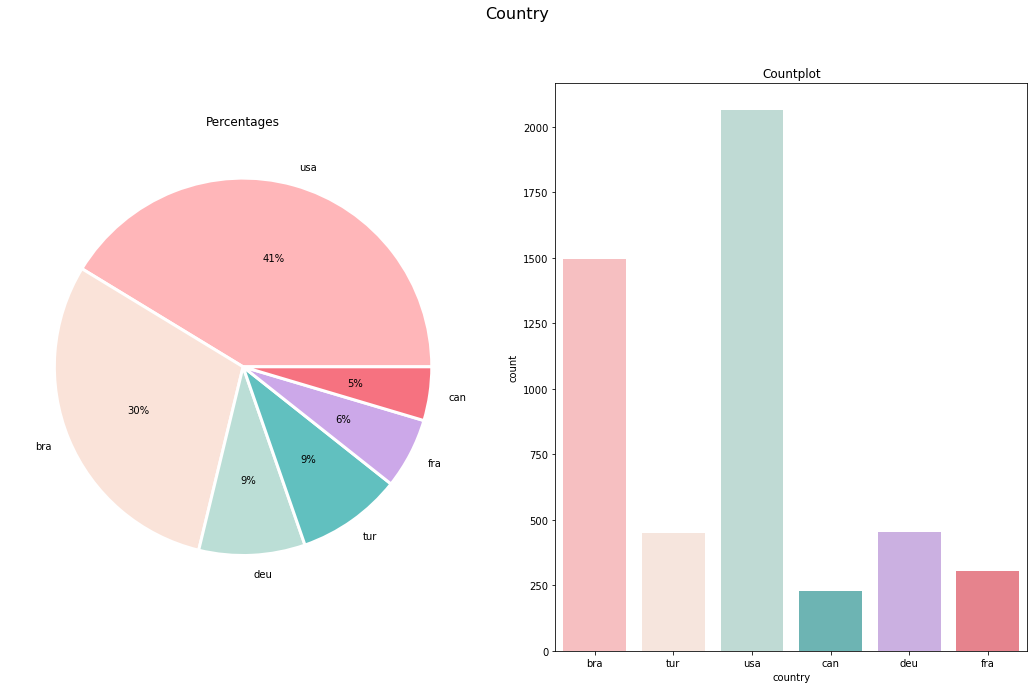

In [10]:
cat_plots(df, "country")

- Soru 6 Ülkelere göre satışlardan toplam ne kadar kazanılmış?

In [11]:
def cat_summary(dataframe, cat_col, target, plot=True):
    
        print(pd.DataFrame({cat_col: dataframe[cat_col].value_counts(),
                            "Ratio": 100 * dataframe[cat_col].value_counts() / len(dataframe),
                            "Target_Median": dataframe.groupby(cat_col)[target].median(),
                            "Target_Mean": dataframe.groupby(cat_col)[target].mean(),
                           "Target Sum": dataframe.groupby(cat_col)[target].sum()}))
        print("".center(100, "#"))
        sns.set(rc={'figure.figsize':(15,10)})
        sns.set_style("whitegrid")
        sns.countplot(data=dataframe, x=cat_col, hue=target, palette=colors)
        plt.title(f"Count plot of {cat_col.capitalize()}")
        plt.show(block=True)

     country  Ratio  Target_Median  Target_Mean  Target Sum
bra     1496  29.92           39.0    34.327540       51354
can      230   4.60           29.0    33.608696        7730
deu      455   9.10           39.0    34.032967       15485
fra      303   6.06           29.0    33.587459       10177
tur      451   9.02           39.0    34.787140       15689
usa     2065  41.30           29.0    34.007264       70225
####################################################################################################


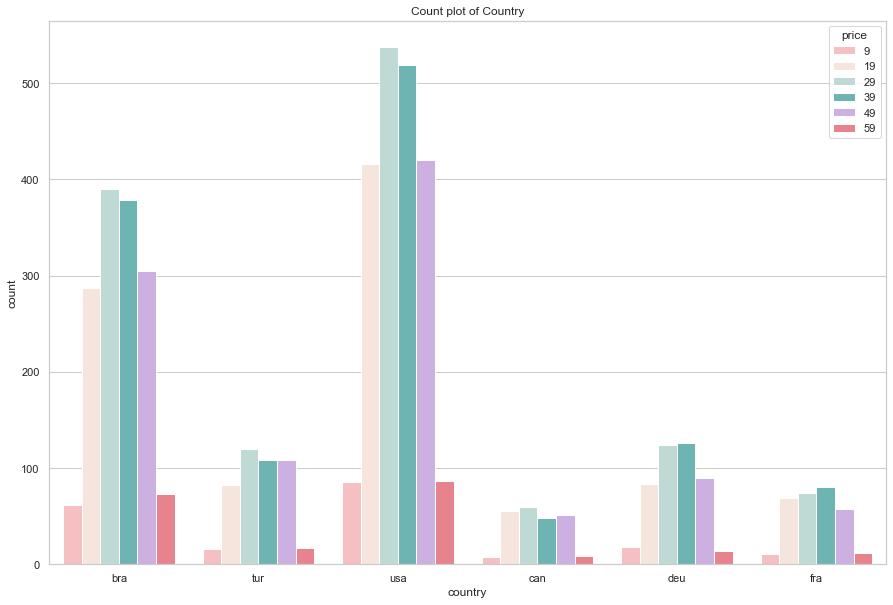

In [12]:
cat_summary(df, "country", "price")

- Soru 7: Source türlerine göre satış sayıları nedir? <br>
- Soru 9: Source türlerine göre price ortalaması nedir?

         source  Ratio  Target_Median  Target_Mean  Target Sum
android    2974  59.48           39.0    34.174849      101636
ios        2026  40.52           29.0    34.069102       69024
####################################################################################################


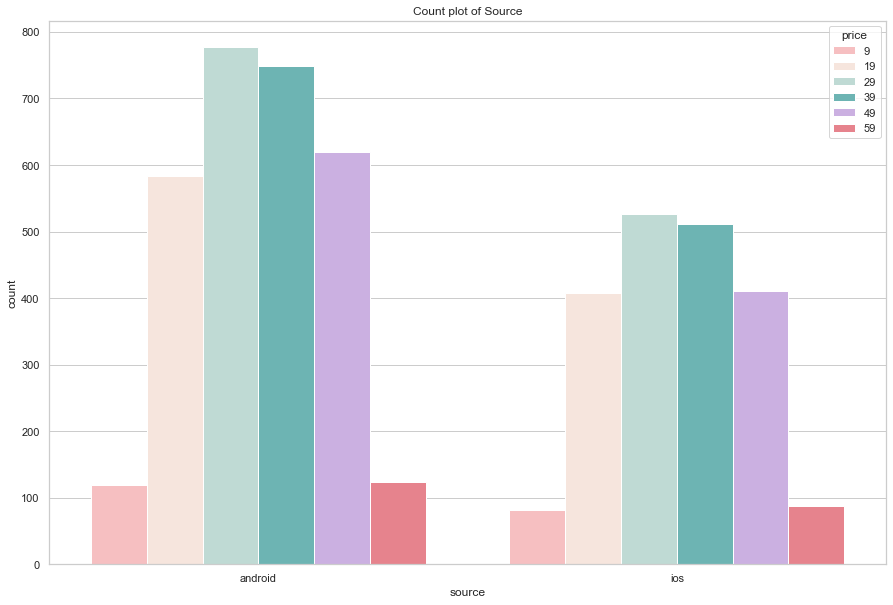

In [13]:
cat_summary(df, "source", "price")

- Soru 8: Ülkelere göre Price ortalaması nedir?

     country  Ratio  Target_Median  Target_Mean  Target Sum
bra     1496  29.92           39.0    34.327540       51354
can      230   4.60           29.0    33.608696        7730
deu      455   9.10           39.0    34.032967       15485
fra      303   6.06           29.0    33.587459       10177
tur      451   9.02           39.0    34.787140       15689
usa     2065  41.30           29.0    34.007264       70225
####################################################################################################


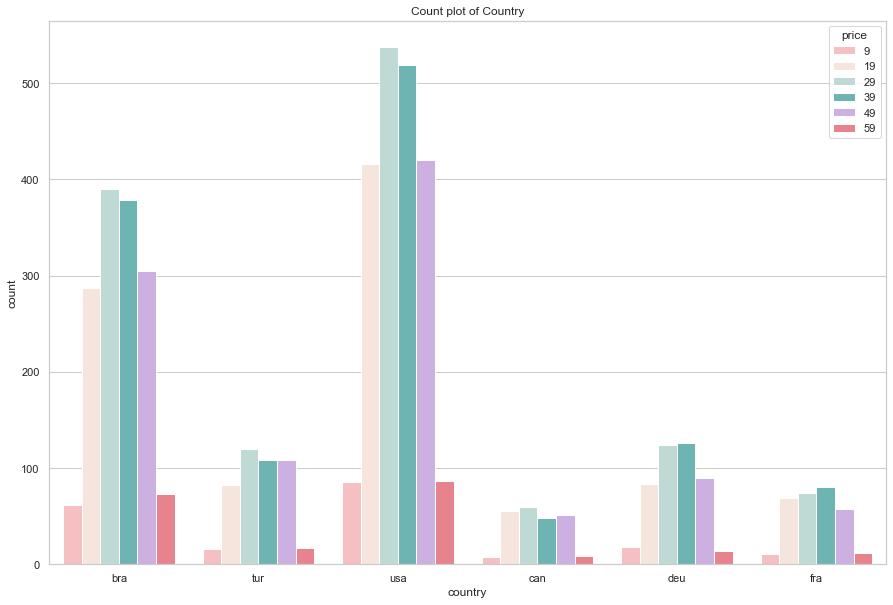

In [14]:
cat_summary(df, "country", "price")

- Soru 10: Country-Source kırılımnda price ortalamaları nedir?

                     price
country source            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703


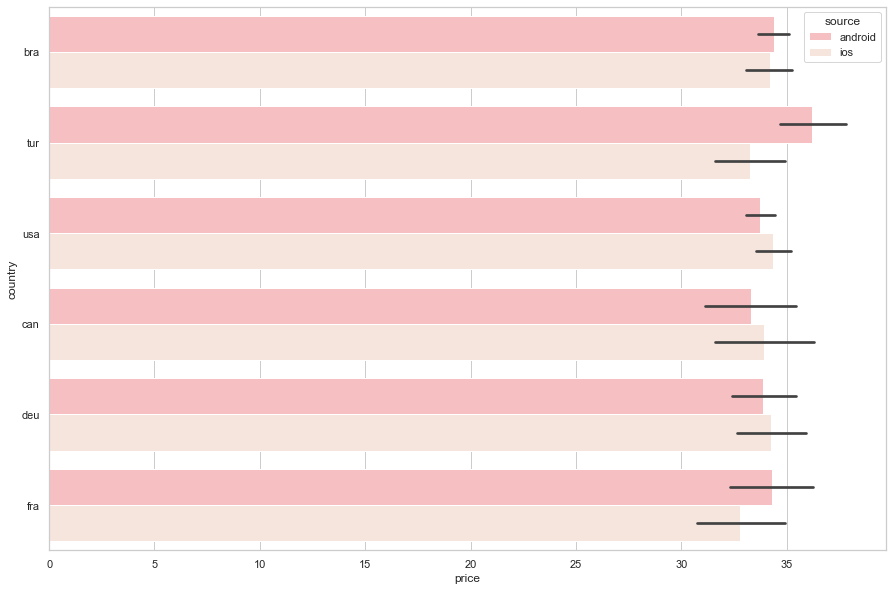

In [15]:
print(df.groupby(["country", "source"]).agg({"price": "mean"}))
sns.barplot(data=df, y="country", x="price", hue="source", palette=colors, orient="h")
plt.show()

### Görev 2: Country, Source, Sex, Age kırılımında ortalama kazançlar nedir?

In [16]:
df.groupby(["country", "source", "sex", "age"]).agg({"price": "mean"})

price
country source  sex    age           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

### Görev 3: Çıktıyı Price'a göre sıralayınız.

In [17]:
agg_df = df.groupby(["country", "source", "sex", "age"]).agg({"price": "mean"}).sort_values("price", ascending=False)
agg_df

price
country source  sex    age       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

### Görev 4: Indexte yer alan isimleri değişken ismine çeviriniz.

In [18]:
agg_df.reset_index(inplace=True)
agg_df

,country,source,sex,age,price
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


### Görev 5: Age değişkenini kategorik değişkene çeviriniz ve agg_df'e ekleyiniz.

In [19]:
agg_df["new_age_cat"] = pd.cut(agg_df["age"], bins=[0, 18, 23, 30, 40, 70], labels=["0_18", "19_23", "24_30", "31_40", "41_70"])
agg_df.sample(10)

,country,source,sex,age,price,new_age_cat
323,bra,android,female,27,26.142857,24_30
4,deu,android,female,36,49.000000,31_40
220,usa,android,female,15,32.666667,0_18
151,usa,android,male,35,34.714286,31_40
185,fra,android,female,35,34.000000,31_40
190,usa,ios,female,15,33.857143,0_18
178,deu,ios,female,22,34.000000,19_23
7,usa,android,female,47,49.000000,41_70
177,tur,ios,female,26,34.000000,24_30
69,can,ios,male,17,37.666667,0_18


### Görev 6: Yeni seviye tabanlı müşterileri tnaımlayınız.

In [20]:
agg_df.values

array([['bra', 'android', 'male', 46, 59.0, '41_70'],
       ['usa', 'android', 'male', 36, 59.0, '31_40'],
       ['fra', 'android', 'female', 24, 59.0, '24_30'],
       ...,
       ['can', 'android', 'female', 27, 19.0, '24_30'],
       ['fra', 'android', 'male', 18, 19.0, '0_18'],
       ['deu', 'android', 'male', 26, 9.0, '24_30']], dtype=object)

In [21]:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]
agg_df.sample(10)
# Dikkat! List comprehension ile customers_level_based değerleri oluşturulduktan sonra bu değerlerin tekilleştirilmesi gerekmektedir.
# Örneğin birden fazla şu ifadeden olabilir: USA_ANDROID_MALE_0_18. Bunları groupby'a alıp price ortalamalarını almak gerekmektedir

,country,source,sex,age,price,new_age_cat,customers_level_based
38,bra,android,male,24,40.428571,24_30,BRA_ANDROID_MALE_24_30
325,can,android,female,15,25.666667,0_18,CAN_ANDROID_FEMALE_0_18
58,bra,ios,female,42,39.000000,41_70,BRA_IOS_FEMALE_41_70
134,usa,ios,female,20,35.000000,19_23,USA_IOS_FEMALE_19_23
321,fra,android,female,19,27.333333,19_23,FRA_ANDROID_FEMALE_19_23
274,bra,ios,female,29,30.428571,24_30,BRA_IOS_FEMALE_24_30
98,usa,android,male,30,36.142857,24_30,USA_ANDROID_MALE_24_30
250,usa,ios,male,37,31.727273,31_40,USA_IOS_MALE_31_40
301,deu,android,female,33,29.000000,31_40,DEU_ANDROID_FEMALE_31_40
15,tur,ios,female,18,44.000000,0_18,TUR_IOS_FEMALE_0_18


In [22]:
agg_df = agg_df.groupby("customers_level_based").agg({"price": "mean"}).sort_values("price", ascending=False).reset_index()
agg_df.sample(10)

,customers_level_based,price
16,DEU_ANDROID_MALE_0_18,37.248792
3,TUR_ANDROID_FEMALE_31_40,41.833333
49,USA_ANDROID_MALE_19_23,34.270652
31,USA_IOS_MALE_41_70,35.750000
24,DEU_ANDROID_FEMALE_41_70,36.083333
38,CAN_ANDROID_MALE_24_30,35.009615
8,TUR_ANDROID_MALE_24_30,39.439103
75,DEU_IOS_MALE_24_30,33.000000
66,USA_ANDROID_FEMALE_0_18,33.649390
67,USA_ANDROID_FEMALE_19_23,33.627634


### Görev 7: Yeni müşterileri segmentlere ayırınız.

In [23]:
agg_df["segment"] = pd.qcut(agg_df["price"], q=4, labels=["D", "C", "B", "A"])
agg_df.head(10)

,customers_level_based,price,segment
0,FRA_ANDROID_FEMALE_24_30,45.428571,A
1,TUR_IOS_MALE_24_30,45.000000,A
2,TUR_IOS_MALE_31_40,42.333333,A
3,TUR_ANDROID_FEMALE_31_40,41.833333,A
4,CAN_ANDROID_MALE_19_23,40.111111,A
5,BRA_ANDROID_MALE_41_70,40.041667,A
6,FRA_IOS_MALE_19_23,39.888889,A
7,TUR_ANDROID_MALE_0_18,39.873016,A
8,TUR_ANDROID_MALE_24_30,39.439103,A
9,USA_ANDROID_FEMALE_41_70,39.250000,A


In [24]:
agg_df.nunique()

customers_level_based    109
price                     96
segment                    4
dtype: int64

### Görev 8: Yeni gelen müşterileri sınıflandırıp, ne kadar gelir getirebileceklerini tahmin ediniz.

In [25]:
# 33 yaşında ANDROID kullanan bir Türk kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] ==  new_user]

,customers_level_based,price,segment
3,TUR_ANDROID_FEMALE_31_40,41.833333,A


In [26]:
# 35 yaşında IOS kullanan bir Fransız kadını hangi segmente aittir ve ortalama ne kadar gelir kazandırması beklenir?
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] ==  new_user]

,customers_level_based,price,segment
78,FRA_IOS_FEMALE_31_40,32.818182,C
